In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
#keys: w, t1, t2, t3, BL1, BL2, h, sl, st, Lr1, L1, beta1, beta2, beta3, alpha
keys = ["w", "t1", "t2", "t3", "BL1", "BL2", "h", "sl", "st", "Lr1", "L1", "beta1", "beta2", "beta3", "alpha"]

var = 'sl'
sweep = []
#loop over txt files in the current directory
for file in os.listdir("."):
    #skip files that are not txt files
    if not file.endswith(".txt"):
        continue
    #skip files that are not result files
    if not file.startswith("result"):
        continue

    
    header = np.loadtxt(file, delimiter=",", max_rows=1)
    data = np.loadtxt(file, delimiter=",", skiprows=1)
    params = {k:v for k,v in zip(keys, header)}
    sweep.append({"params": params, "data": data})

sweep.sort(key=lambda x: x["params"][var])


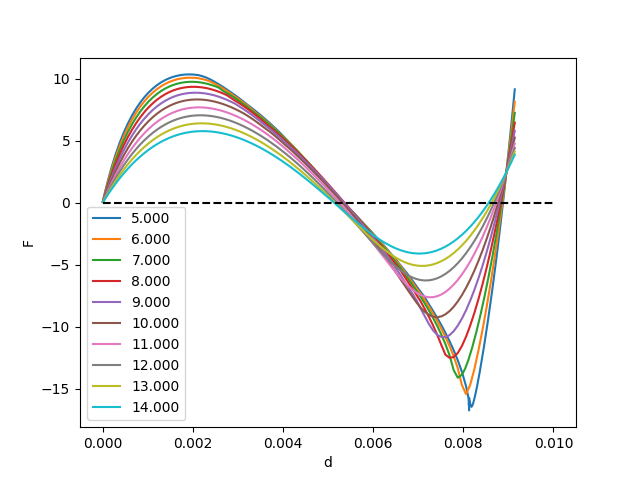

Text(0.5, 1.0, 'Bistable support beam length sweep')

In [27]:
#loop over sweep and plot the 2nd and 3rd columns of each data array in a new subplot
#create 3d plot
%matplotlib ipympl
fig = plt.figure()


for result in sweep:
    data = result["data"]
    parameter = result["params"][var]*np.ones_like(data[:,1])
    plt.plot(data[:,1], data[:,2], label=f'{result["params"][var]*1000:0.3f}')
    #change line style for each line, dashed, dotted, solid
    

    


plt.hlines(0,0,0.01, colors="k", linestyles="dashed")

plt.xlabel("d")
plt.ylabel("F")
plt.legend()
plt.show()
plt.title("Bistable support beam length sweep")


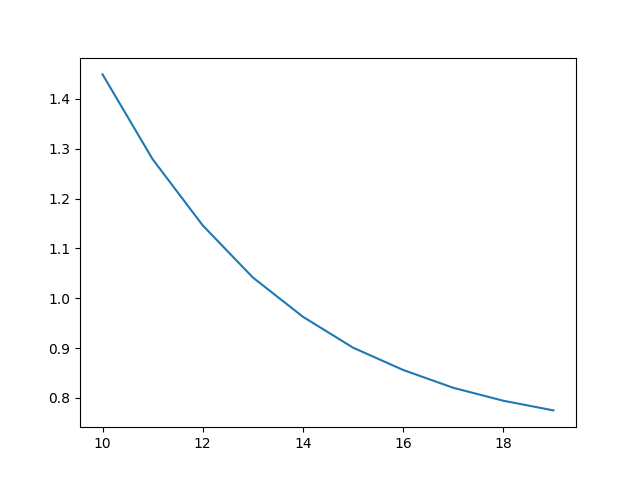

In [50]:

fration = []
for result in sweep[:]:
    data = result["data"]
    maxf = max(data[:,2])
    minf = min(data[:,2])
    ratio = maxf/minf
    fration.append(-ratio)

#plot ratio vs beta2
fig = plt.figure()
plt.plot([result["params"]["beta2"]*180/np.pi for result in sweep[:]], fration)
    #change line style for each line, dashed, dotted, solid

plt.show()